# Overview

https://arxiv.org/abs/1506.01186

In [65]:
import fastcore.all as fc
import matplotlib.pyplot as plt

In [57]:
class TriangluarCycleLearningRate():
    """
    Triangluar Cycle Learning Rate Policy.
    """
    
    def __init__(self, min_LR, max_LR, step_size: int):
        """
        `min_LR` - the minimum learning rate boundary
        `max_LR` - the maximum learning rate boundary
        `step_size` - the number of iterations in half of cycle
        """
        fc.store_attr()
    
    def get_local_LR(self, epoch_counter: int) -> float:
        '''
        From paper algo:
            local cycle = math.floor(1 + epochCounter /(2∗ stepsize ))
            local x = math.abs(epochCounter/stepsize − 2∗cycle + 1)
            local lr = opt .LR + (maxLR − opt.LR) ∗ math.max(0, (1−x))        
        '''
        "This code varies the learning rate linearly between the minimum (min_LR) and the maximum (max_LR)"
        cycle = math.floor(1 + epoch_counter / (2 * self.step_size))
        x = abs(epoch_counter / self.step_size - 2 * cycle + 1)
        local_lr = self.min_LR + (self.max_LR - self.min_LR) * max(0, (1-x))
        return local_lr    

In [56]:
tclr = TriangluarCycleLearningRate(0.001, 0.006, 2000)

In [74]:
tclr.get_local_LR(4000)

0.001

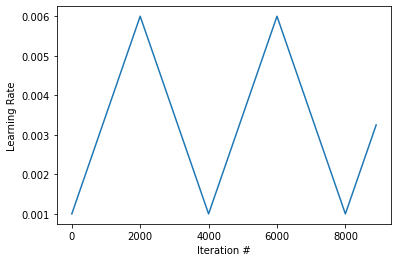

In [83]:
x = [o for o in range(0, 9000, 100)]
y = [tclr.get_local_LR(o) for o in x]
plt.xlabel('Iteration #')
plt.ylabel('Learning Rate')
plt.plot(x,y)

In [5]:
import math

In [ ]:
# An epoch is equal to 500 iterations and a good setting for stepsize is 2,000.

In [27]:
epochCounter = 500
stepsize = 2000
minLR = 0.001
maxLR = 0.006

In [41]:
def _get_cycle_cnt(epoch_iter_cnt, step_size) -> int:
    return math.floor(1 + epoch_iter_cnt / (2 * step_size))

assert _get_cycle_cnt(2000, 2000) == 1
assert _get_cycle_cnt(4000, 2000) == 2
assert _get_cycle_cnt(9000, 2000) == 3

In [49]:
abs(4000/2000 - 2*2 + 1)

1.0

In [51]:
0.001 + (0.006-0.001)*max(0, 1-1)

0.001